Exercise: Finding the Best k in kNN Regression

The goal here is to find the value of k of the best performing model based on the test MSE.

Instructions:
    Read the data into a Pandas dataframe object.

    Select the sales column as the response variable and TV budget column as the predictor variable.

    Make a train-test split using sklearn.model_selection.train_test_split.

    Create a list of integer k values using numpy.linspace.

    For each value of k
    
        Fit a kNN regression on train set.

        Calculate MSE on test set and store it.

    Plot the test MSE values for each k.

    Find the k value associated with the lowest test MSE.

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

Reading the standard Advertising dataset

In [35]:
#Read the csv file into a pandas ds
df = pd.read_csv("ds_advertising.csv")

#take a quick look at the data to
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
#set the Tv column as predictor variable and the sales column as the response variable
x = df[["TV"]].values
y = df[["Sales"]].values

Train-Test split

In [37]:
### edTest(test_shape) ###
# Split the dataset in training and testing with 60% training set and 
# 40% testing set 
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6,random_state=66)

In [38]:
### edTest(test_nums) ###
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min and 
# k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

Model fit

ValueError: Found input variables with inconsistent numbers of samples: [200, 80]

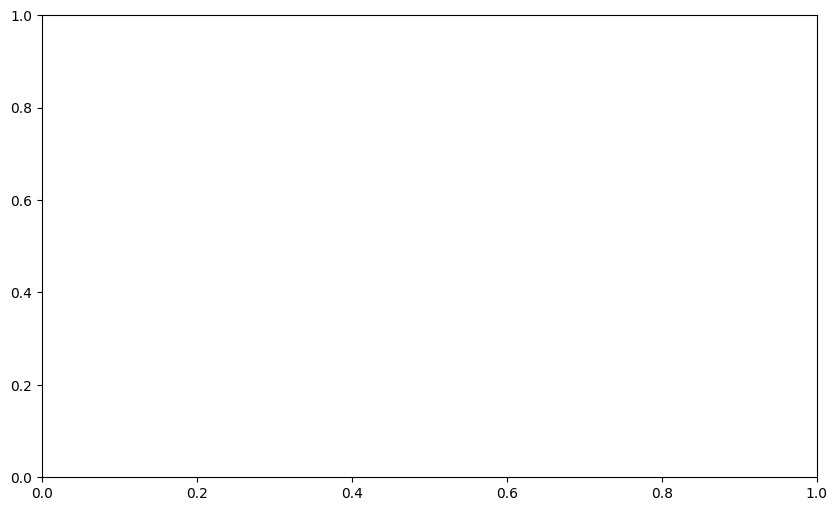

In [39]:
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10,6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j=0

# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y,y_pred)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE
    
    
    # Helper code to plot the data and various kNN model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()